In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 83% 124M/149M [00:00<00:00, 356MB/s] 
100% 149M/149M [00:00<00:00, 324MB/s]


In [3]:
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0349.jpg,notumor
1,/content/Training/notumor/Tr-no_0607.jpg,notumor
2,/content/Training/notumor/Tr-no_0230.jpg,notumor
3,/content/Training/notumor/Tr-no_1584.jpg,notumor
4,/content/Training/notumor/Tr-no_0419.jpg,notumor
...,...,...
5707,/content/Training/pituitary/Tr-pi_0947.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1036.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_1397.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1281.jpg,pituitary


In [6]:
ts_df = get_class_paths("/content/Testing")
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0253.jpg,notumor
1,/content/Testing/notumor/Te-no_0401.jpg,notumor
2,/content/Testing/notumor/Te-no_0027.jpg,notumor
3,/content/Testing/notumor/Te-no_0303.jpg,notumor
4,/content/Testing/notumor/Te-no_0058.jpg,notumor
...,...,...
1306,/content/Testing/pituitary/Te-pi_0021.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0083.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0240.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0266.jpg,pituitary


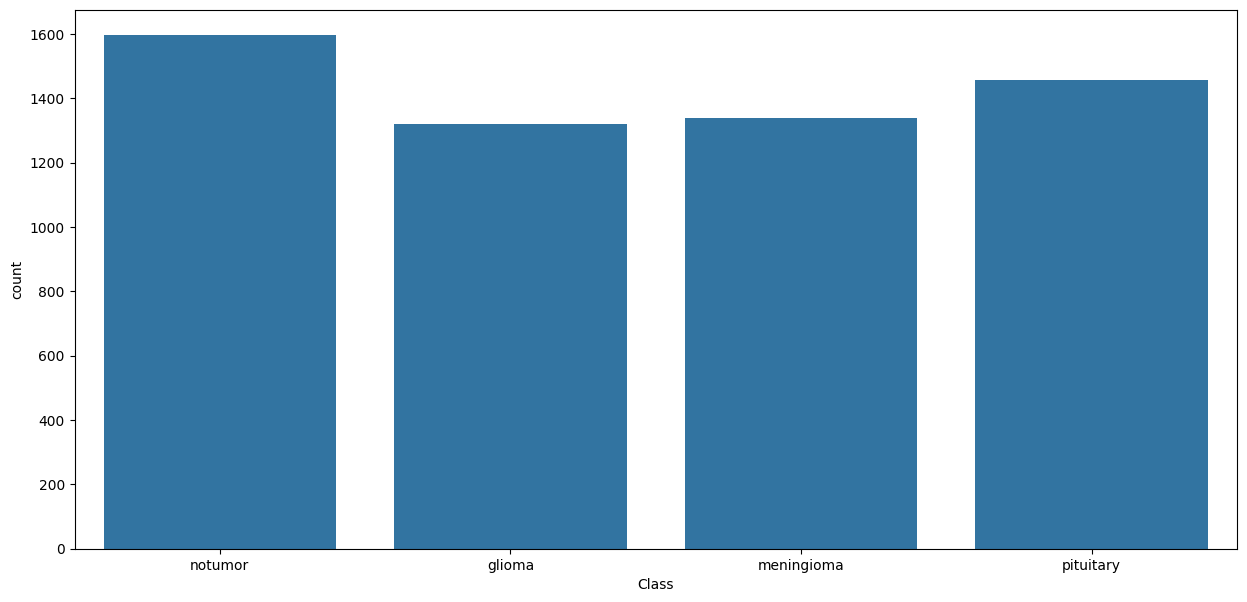

In [7]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

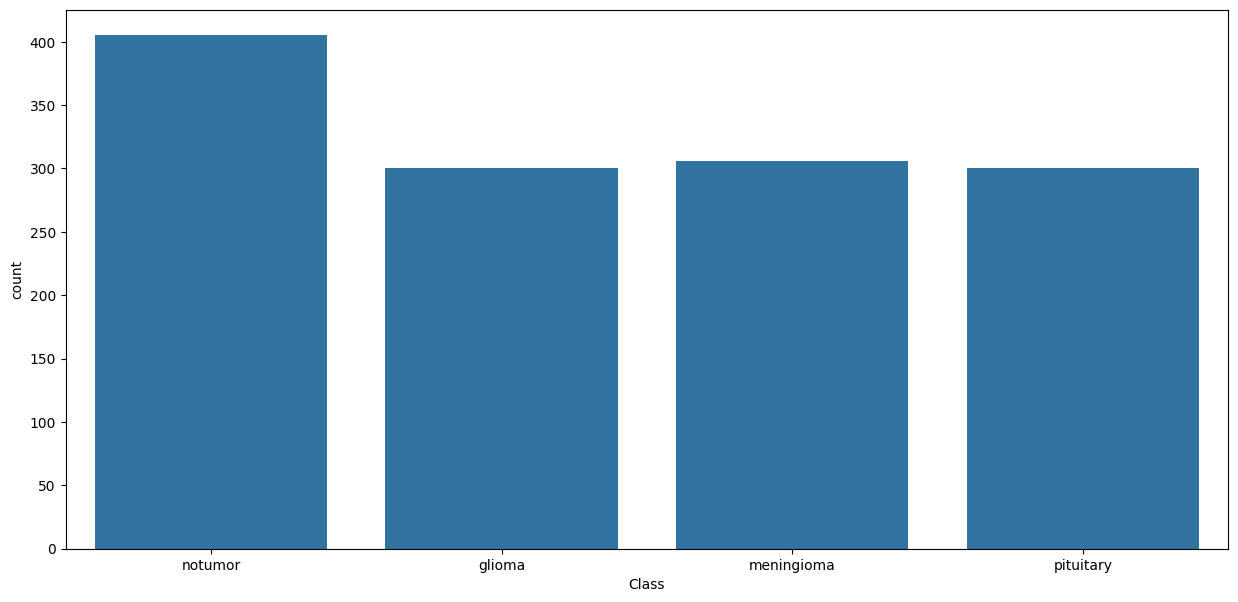

In [8]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [11]:
valid_df

,Class Path,Class
1090,/content/Testing/pituitary/Te-pi_0165.jpg,pituitary
493,/content/Testing/glioma/Te-gl_0237.jpg,glioma
247,/content/Testing/notumor/Te-no_0374.jpg,notumor
570,/content/Testing/glioma/Te-gl_0133.jpg,glioma
9,/content/Testing/notumor/Te-no_0240.jpg,notumor
...,...,...
1064,/content/Testing/pituitary/Te-pi_0153.jpg,pituitary
1292,/content/Testing/pituitary/Te-pi_0146.jpg,pituitary
526,/content/Testing/glioma/Te-gl_0180.jpg,glioma
892,/content/Testing/meningioma/Te-me_0204.jpg,meningioma


In [12]:
ts_df

,Class Path,Class
1197,/content/Testing/pituitary/Te-pi_0055.jpg,pituitary
864,/content/Testing/meningioma/Te-me_0301.jpg,meningioma
1029,/content/Testing/pituitary/Te-pi_0134.jpg,pituitary
667,/content/Testing/glioma/Te-gl_0050.jpg,glioma
817,/content/Testing/meningioma/Te-me_0188.jpg,meningioma
...,...,...
745,/content/Testing/meningioma/Te-me_0217.jpg,meningioma
681,/content/Testing/glioma/Te-gl_0089.jpg,glioma
1133,/content/Testing/pituitary/Te-pi_0264.jpg,pituitary
369,/content/Testing/notumor/Te-no_0172.jpg,notumor


In [13]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [14]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)
ts_gen = image_generator.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


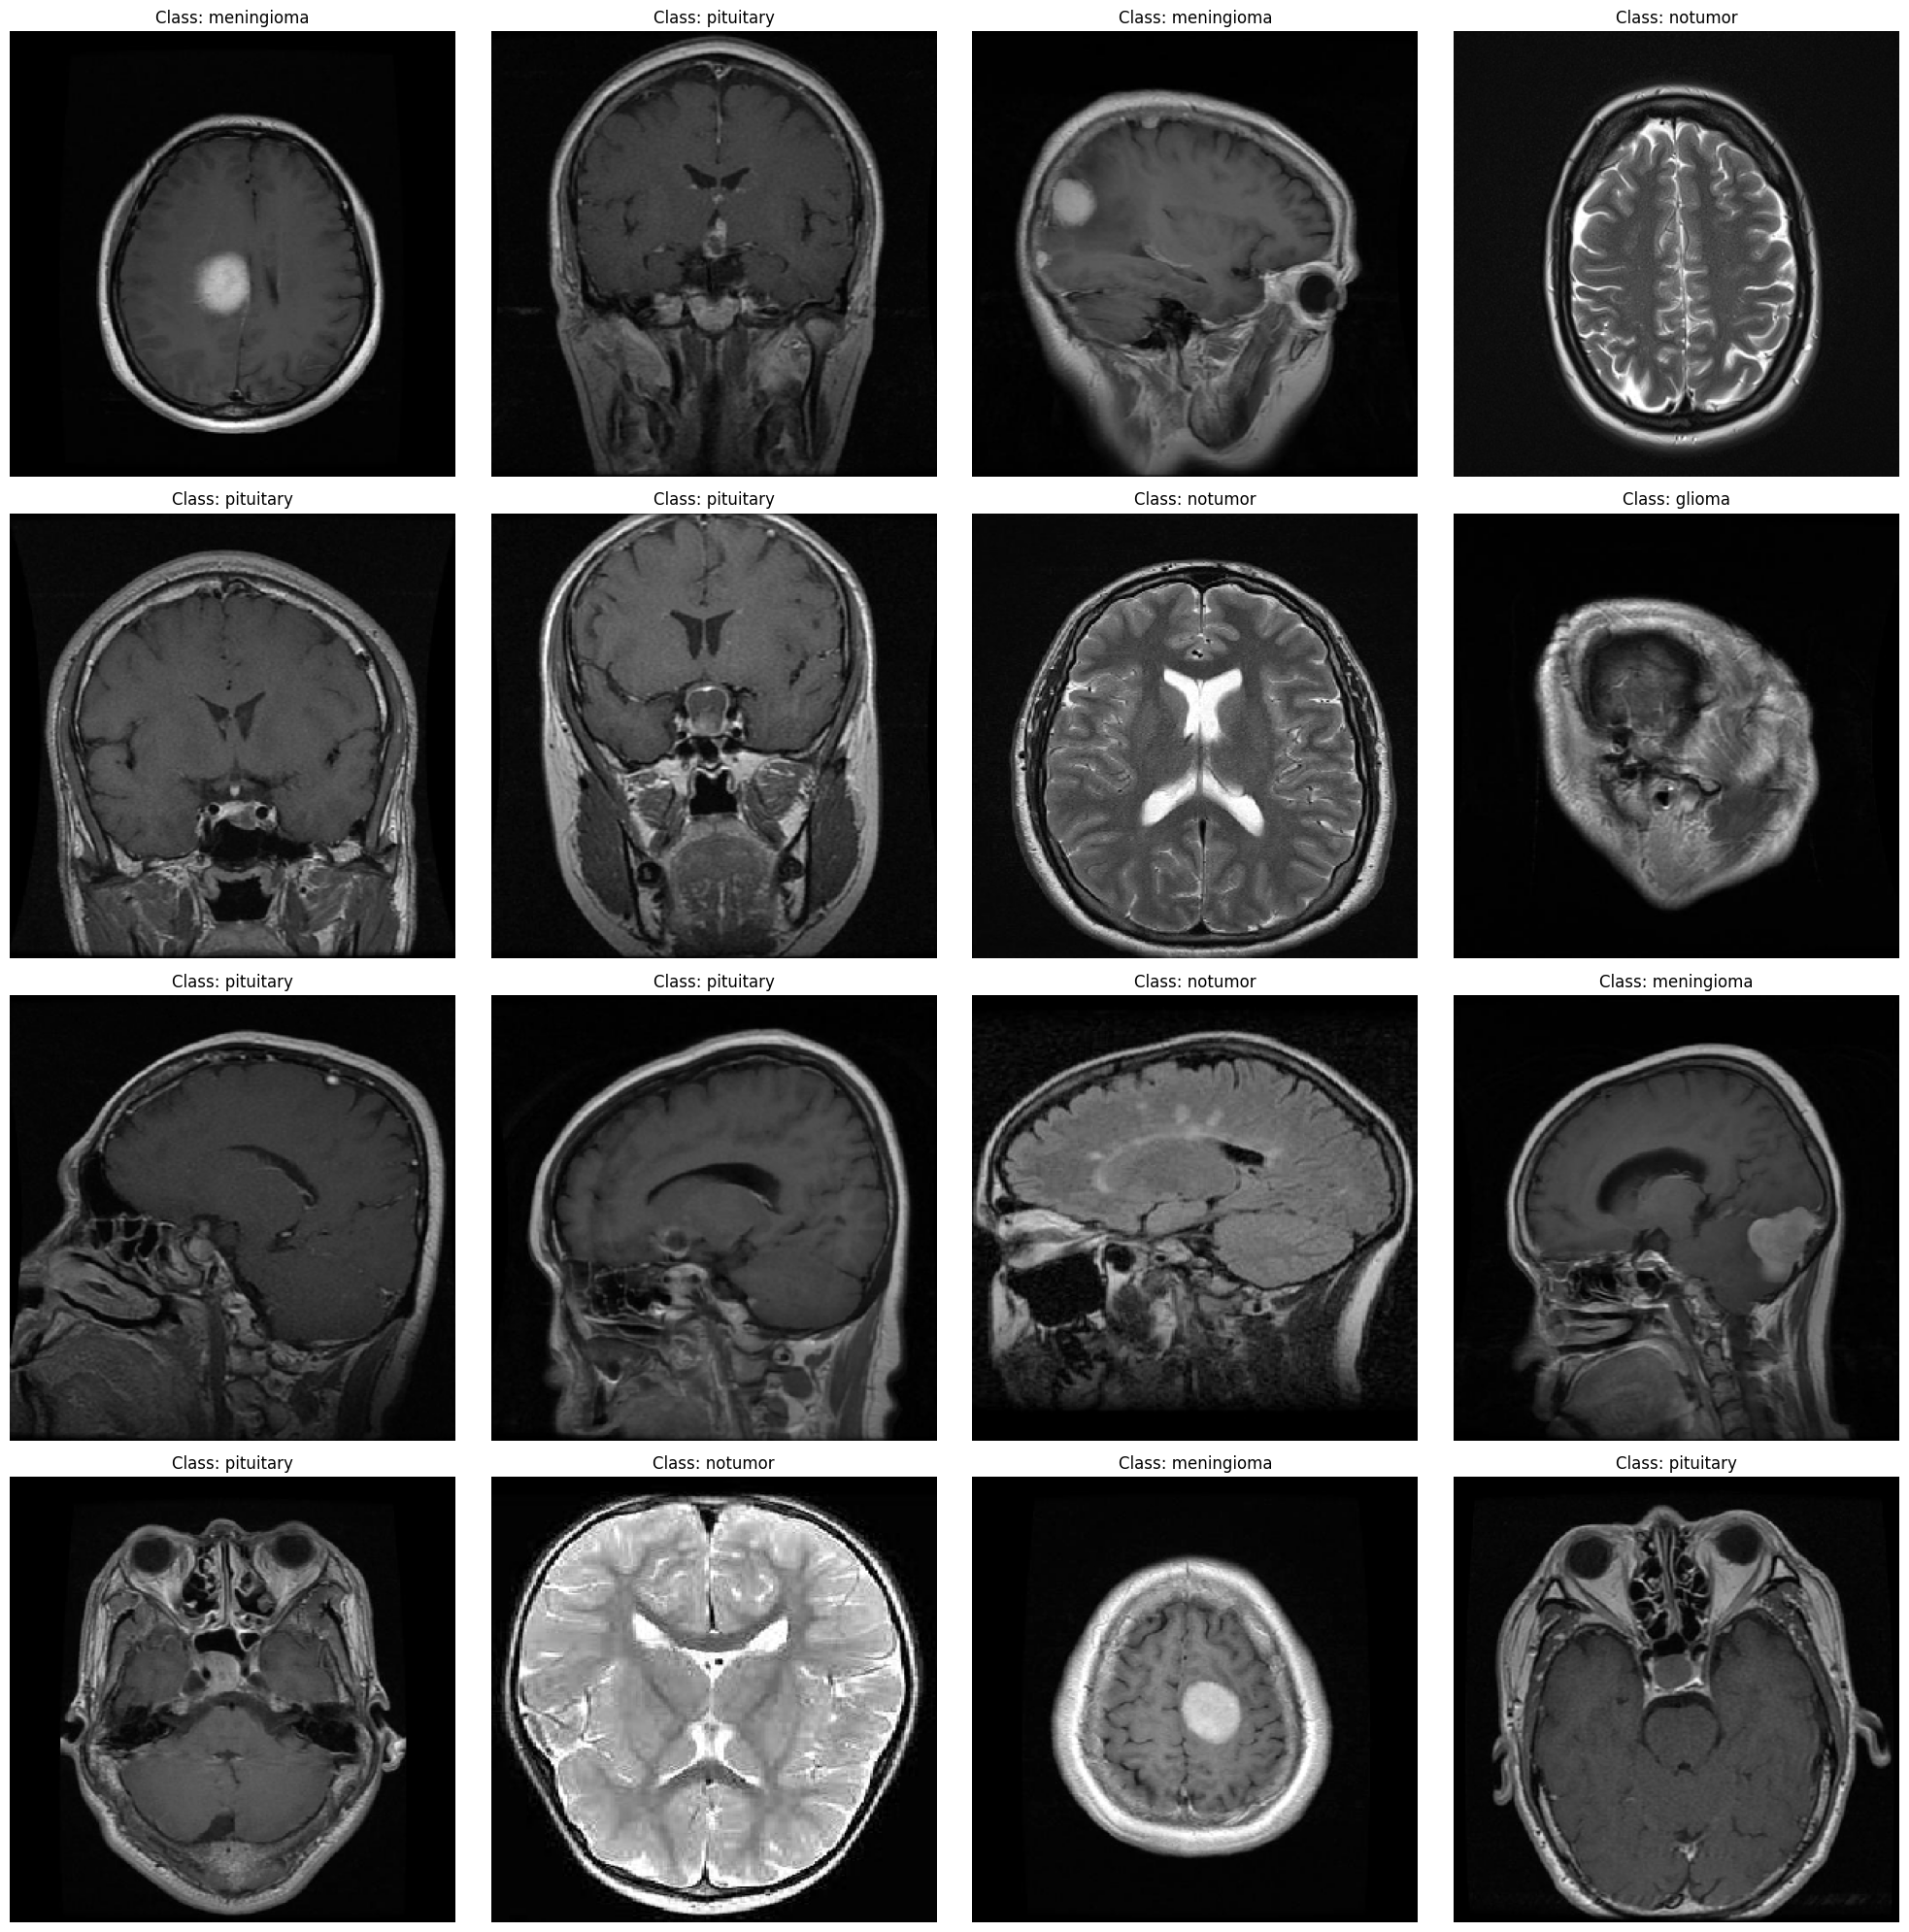

In [15]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)
  class_name = class_names[index_position]
  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

83683744/83683744 [==============================] - 0s 0us/step


In [17]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
179/179 [==============================] - 910s 5s/step - loss: 0.7312 - accuracy: 0.6852 - precision: 0.8727 - recall: 0.5546 - val_loss: 0.5613 - val_accuracy: 0.7664 - val_precision: 0.7970 - val_recall: 0.7313
Epoch 2/5
 85/179 [=============>................] - ETA: 7:36 - loss: 0.1691 - accuracy: 0.9375 - precision: 0.9384 - recall: 0.9357

In [ ]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')


  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}")
print(f"Test Loss: {test_score[0]:.4f}")

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  labels = list(class_dict.keys())
  plt.figure(figsize=(6, 8))
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  predictions = model.predict(img_array)
  probabilities = list(predictions[0])
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()
  print(f"\nPredicted tumor type: {predicted_class}")

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")